In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
from pathlib import Path
import sys

sys.path.append(str(Path("..").resolve()))
from lib3.brownian_motion import ParamBrownianMotion,BrownianMotion
from simulation4 import N_seed, x0s, sigmas, get_simulator

事前にsimulation4.pyを実行しておく

## 実験結果を検索 (mlflow.search_runs)
pandasのDataFrameとして得られるので、その後の加工が楽。

In [3]:
import mlflow
import simulation4

In [4]:
cache_dir = str(Path(simulation4.__file__).parent.joinpath("mlruns"))
mlflow.set_tracking_uri(cache_dir)
mlflow_client = mlflow.tracking.MlflowClient(
    tracking_uri=cache_dir
)
exp = mlflow_client.get_experiment_by_name("sim4")

### 正常にシミュレーションが終了した結果を全て取得する

In [5]:
query = "attributes.status = 'FINISHED'"
df_result = mlflow.search_runs(
    experiment_ids=[exp.experiment_id],
    filter_string=query,
)

In [6]:
df_result

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.state,params.save_full_traj,params.record_per,params.param_bm.seed,params.total_step,params.param_bm.initial_state,params.param_bm.sigma,tags.mlflow.source.type,tags.mlflow.source.name,tags.mlflow.user,tags.mlflow.source.git.commit
0,a00470b61cde450d9836b6f95dc9ca1d,4,FINISHED,/workspaces/mlflow-demo/mlruns/4/a00470b61cde4...,2021-10-15 08:16:21.285000+00:00,2021-10-15 08:16:22.111000+00:00,-0.630327,True,10,4,500,-1.0,0.2,LOCAL,simulation4.py,vscode,eab15a1ae74715fae02cc0618e06c456b7dd6b83
1,bccf724fcf70463a86a1d89dab17d94d,4,FINISHED,/workspaces/mlflow-demo/mlruns/4/bccf724fcf704...,2021-10-15 08:16:20.152000+00:00,2021-10-15 08:16:20.890000+00:00,-0.815163,True,10,4,500,-1.0,0.1,LOCAL,simulation4.py,vscode,eab15a1ae74715fae02cc0618e06c456b7dd6b83
2,a579174b220d4b099c22ce268180a1fb,4,FINISHED,/workspaces/mlflow-demo/mlruns/4/a579174b220d4...,2021-10-15 08:16:18.922000+00:00,2021-10-15 08:16:19.780000+00:00,1.369673,True,10,4,500,1.0,0.2,LOCAL,simulation4.py,vscode,eab15a1ae74715fae02cc0618e06c456b7dd6b83
3,38c6e52d7c584795afc0ca747ebaffd3,4,FINISHED,/workspaces/mlflow-demo/mlruns/4/38c6e52d7c584...,2021-10-15 08:16:17.561000+00:00,2021-10-15 08:16:18.480000+00:00,1.184837,True,10,4,500,1.0,0.1,LOCAL,simulation4.py,vscode,eab15a1ae74715fae02cc0618e06c456b7dd6b83
4,b4296fb013e349dd9f92ea47bbedf81a,4,FINISHED,/workspaces/mlflow-demo/mlruns/4/b4296fb013e34...,2021-10-15 08:16:16.399000+00:00,2021-10-15 08:16:17.190000+00:00,4.499493,True,10,3,500,-1.0,0.2,LOCAL,simulation4.py,vscode,eab15a1ae74715fae02cc0618e06c456b7dd6b83
5,583c6d554d6a4d96a3183469022e69e0,4,FINISHED,/workspaces/mlflow-demo/mlruns/4/583c6d554d6a4...,2021-10-15 08:16:15.361000+00:00,2021-10-15 08:16:16.074000+00:00,1.749746,True,10,3,500,-1.0,0.1,LOCAL,simulation4.py,vscode,eab15a1ae74715fae02cc0618e06c456b7dd6b83
6,2d3571f7042a41dda8fb2c4b1fadfe05,4,FINISHED,/workspaces/mlflow-demo/mlruns/4/2d3571f7042a4...,2021-10-15 08:16:14.245000+00:00,2021-10-15 08:16:15.072000+00:00,6.499493,True,10,3,500,1.0,0.2,LOCAL,simulation4.py,vscode,eab15a1ae74715fae02cc0618e06c456b7dd6b83
7,9f6bfa2a81fa4012b81d8869ff511276,4,FINISHED,/workspaces/mlflow-demo/mlruns/4/9f6bfa2a81fa4...,2021-10-15 08:16:13.105000+00:00,2021-10-15 08:16:13.946000+00:00,3.749746,True,10,3,500,1.0,0.1,LOCAL,simulation4.py,vscode,eab15a1ae74715fae02cc0618e06c456b7dd6b83
8,d6bc9961c6be4369a42d6beaaebadb7b,4,FINISHED,/workspaces/mlflow-demo/mlruns/4/d6bc9961c6be4...,2021-10-15 08:16:11.465000+00:00,2021-10-15 08:16:12.834000+00:00,-6.341827,True,10,2,500,-1.0,0.2,LOCAL,simulation4.py,vscode,eab15a1ae74715fae02cc0618e06c456b7dd6b83
9,aaa35b73c37d4844b314942ba59db07f,4,FINISHED,/workspaces/mlflow-demo/mlruns/4/aaa35b73c37d4...,2021-10-15 08:16:09.251000+00:00,2021-10-15 08:16:10.730000+00:00,-3.670913,True,10,2,500,-1.0,0.1,LOCAL,simulation4.py,vscode,eab15a1ae74715fae02cc0618e06c456b7dd6b83


ただし時系列データをmetricとして記録させている場合は、このDataFrameには時系列全体の情報は入っておらず、最終時刻の値しか入っていない。時系列全体を取得する方法は後述。

### sigmaとinitial_stateでグループ分けして最終状態の統計量を取得

パラメータが数値ではなく文字列として格納されているので、数字に直しておくと便利

In [7]:
df_result["sigma"] = df_result["params.param_bm.sigma"].apply(float)
df_result["x0"] = df_result["params.param_bm.initial_state"].apply(float)

In [8]:
df_result.groupby(["sigma", "x0"])["metrics.state"].describe()

count      mean       std       min       25%       50%       75%  \
sigma x0                                                                        
0.1   -1.0    5.0 -1.573548  2.126323 -3.670913 -2.786916 -2.344495 -0.815163   
       1.0    5.0  0.426452  2.126323 -1.670913 -0.786916 -0.344495  1.184837   
0.2   -1.0    5.0 -2.147097  4.252646 -6.341827 -4.573832 -3.688990 -0.630327   
       1.0    5.0 -0.147097  4.252646 -4.341827 -2.573832 -1.688990  1.369673   

                 max  
sigma x0              
0.1   -1.0  1.749746  
       1.0  3.749746  
0.2   -1.0  4.499493  
       1.0  6.499493

In [9]:
df_result.pivot_table(index="sigma", columns="x0", values="metrics.state", aggfunc=np.mean)

x0,-1.0,1.0
sigma,,
0.1,-1.573548,0.426452
0.2,-2.147097,-0.147097


<AxesSubplot:xlabel='x0', ylabel='sigma'>

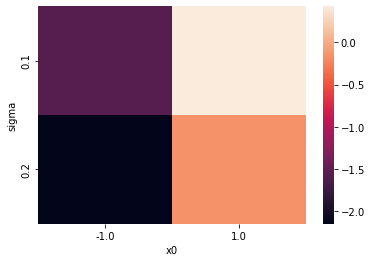

In [10]:
sns.heatmap(df_result.pivot_table(
    index="sigma", columns="x0", values="metrics.state",
    aggfunc=np.mean
))

### 時系列全体を取得する
`run_id`を指定してget_metric_histroy()を呼ぶ必要がある。

In [11]:
history = mlflow_client.get_metric_history(df_result.loc[0, "run_id"], "state")

In [12]:
history

[<Metric: key='state', step=0, timestamp=1634285781487, value=-1.0>,
 <Metric: key='state', step=9, timestamp=1634285781502, value=-1.3982970775032995>,
 <Metric: key='state', step=19, timestamp=1634285781517, value=-1.123613722671141>,
 <Metric: key='state', step=29, timestamp=1634285781524, value=-1.852119143219679>,
 <Metric: key='state', step=39, timestamp=1634285781535, value=-1.9458795783072127>,
 <Metric: key='state', step=49, timestamp=1634285781545, value=-1.9294883382857977>,
 <Metric: key='state', step=59, timestamp=1634285781554, value=-2.02788229242719>,
 <Metric: key='state', step=69, timestamp=1634285781564, value=-1.7838786995375902>,
 <Metric: key='state', step=79, timestamp=1634285781574, value=-2.053931820406514>,
 <Metric: key='state', step=89, timestamp=1634285781589, value=-2.3679593624603448>,
 <Metric: key='state', step=99, timestamp=1634285781603, value=-2.2660534863895614>,
 <Metric: key='state', step=109, timestamp=1634285781611, value=-1.7231916355977204>,
 

## 実験結果の取得 (Simulatorクラスを用いる場合)
Simulatorクラスにget_metric_histroy()とget_state_trajectory()を実装している。これらを用いれば簡便に時系列情報を取得できる

### mlflowでの時系列の記録の二通りの方法
* `metric_history`は`record_per`(=10)ステップおきにmlflowではmetricとして記録したもの

* `state_trajectory`は全てのステップの情報を格納したnumpy配列をmlflowのartifactとして記録したもの

metricとして記録するとmlflowのwebインターフェースから見れるが、あまりデータ点が多いと読み込むのが大変になるので間引いたものを用いている。artifactはただのバイナリファイルとして保存されるので、webインターフェースからは中身を見れないがデータが大きくても問題ない。

参考: https://mlflow.org/docs/latest/tracking.html

In [13]:
sim = get_simulator(seed=0, x0=x0s[0], sigma=sigmas[0])

In [14]:
sim.result

{'run_id': '1c9f9b2e8afa4dd4a1d568a922218eaa',
 'experiment_id': '4',
 'status': 'FINISHED',
 'artifact_uri': '/workspaces/mlflow-demo/mlruns/4/1c9f9b2e8afa4dd4a1d568a922218eaa/artifacts',
 'start_time': Timestamp('2021-10-15 08:15:57.577000+0000', tz='UTC'),
 'end_time': Timestamp('2021-10-15 08:15:58.599000+0000', tz='UTC'),
 'metrics': {'state': -0.34449492590095615},
 'params': {'save_full_traj': 'True',
  'record_per': '10',
  'param_bm': {'seed': '0', 'initial_state': '1.0', 'sigma': '0.1'},
  'total_step': '500'},
 'tags': {'mlflow': {'source': {'type': 'LOCAL',
    'name': 'simulation4.py',
    'git': {'commit': 'eab15a1ae74715fae02cc0618e06c456b7dd6b83'}},
   'user': 'vscode'}}}

In [15]:
metric_history = sim.get_metric_history()
state_trajectory = sim.get_state_trajectory()

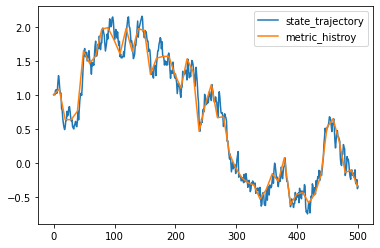

In [16]:
plt.plot(state_trajectory, label="state_trajectory")
plt.plot([metric.step for metric in metric_history],
         [metric.value for metric in metric_history], label="metric_histroy")
plt.legend()